            listing_id  price   neighbourhood_cleansed     room_type  \
date                                                                   
2019-12-05      255809  150.0  De Pijp - Rivierenbuurt  Private room   
2019-12-04      255809  150.0  De Pijp - Rivierenbuurt  Private room   
2019-12-03      255809  150.0  De Pijp - Rivierenbuurt  Private room   
2019-12-02      255809  150.0  De Pijp - Rivierenbuurt  Private room   
2019-12-01      255809  150.0  De Pijp - Rivierenbuurt  Private room   

            accommodates  bedrooms  beds  bathrooms  minimum_nights  \
date                                                                  
2019-12-05             4       2.0   4.0        1.0               2   
2019-12-04             4       2.0   4.0        1.0               2   
2019-12-03             4       2.0   4.0        1.0               2   
2019-12-02             4       2.0   4.0        1.0               2   
2019-12-01             4       2.0   4.0        1.0               2  

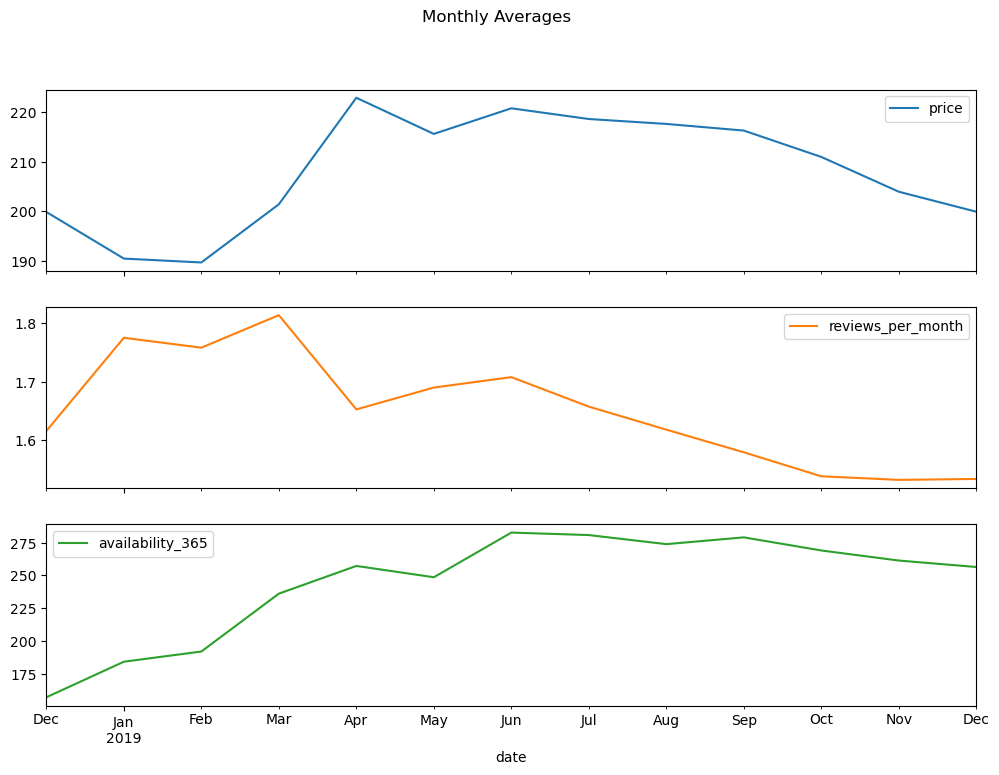


ADF Test for price:
ADF Statistic: -2.0190
p-value: 0.2783
Critical Values: {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}

ADF Test for reviews_per_month:
ADF Statistic: -0.6808
p-value: 0.8517
Critical Values: {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}

ADF Test for availability_365:
ADF Statistic: -0.8699
p-value: 0.7977
Critical Values: {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}


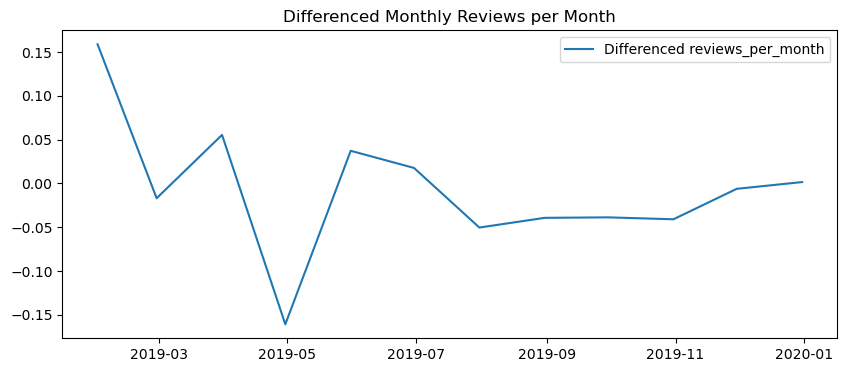

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 1️⃣ Load CSV and parse dates
csv_path = '/Users/am/Desktop/1_CF_Data_Analysis_Essentials /2_Data Analytics_Immersions_2_von_3/6/6.6_raw data/airbnb_listings_slim.csv'
df = pd.read_csv(csv_path, parse_dates=['date'], index_col='date')

# Quick look at data
print(df.head())

# 2️⃣ Resample monthly for key metrics
monthly = df[['price', 'reviews_per_month', 'availability_365']].resample('ME').mean()

# 3️⃣ Plot monthly trends
monthly.plot(subplots=True, figsize=(12, 8), title='Monthly Averages')
plt.show()

# 4️⃣ Run Augmented Dickey-Fuller (ADF) test
for col in ['price', 'reviews_per_month', 'availability_365']:
    series = monthly[col].dropna()
    if series.nunique() <= 1:
        print(f"Series '{col}' is constant; ADF test not applicable.")
        continue
    result = adfuller(series)
    print(f"\nADF Test for {col}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f"Critical Values: {result[4]}")

# 5️⃣ Optional: differencing to make stationary (if needed)
diff_series = monthly['reviews_per_month'].diff().dropna()
plt.figure(figsize=(10,4))
plt.plot(diff_series, label='Differenced reviews_per_month')
plt.title('Differenced Monthly Reviews per Month')
plt.legend()
plt.show()


In [27]:
# 6️⃣ Save plots and processed CSV

# Save the main monthly trends plot
monthly.plot(subplots=True, figsize=(12, 8), title='Monthly Averages')
plt.tight_layout()
monthly_plot_path = '/Users/am/Desktop/airbnb_monthly_plot.png'
plt.savefig(monthly_plot_path)
plt.close()
print(f"Monthly trends plot saved at: {monthly_plot_path}")

# Save the differenced series plot
plt.figure(figsize=(10,4))
plt.plot(diff_series, label='Differenced reviews_per_month')
plt.title('Differenced Monthly Reviews per Month')
plt.legend()
plt.tight_layout()
diff_plot_path = '/Users/am/Desktop/airbnb_diff_reviews_plot.png'
plt.savefig(diff_plot_path)
plt.close()
print(f"Differenced series plot saved at: {diff_plot_path}")

# Save the monthly data to CSV
csv_path = '/Users/am/Desktop/airbnb_monthly_data.csv'
monthly.to_csv(csv_path)
print(f"Monthly data CSV saved at: {csv_path}")


Monthly trends plot saved at: /Users/am/Desktop/airbnb_monthly_plot.png
Differenced series plot saved at: /Users/am/Desktop/airbnb_diff_reviews_plot.png
Monthly data CSV saved at: /Users/am/Desktop/airbnb_monthly_data.csv


# Airbnb Data Monthly Analysis

## 1️⃣ Data Overview
The dataset contains Airbnb listings with daily records, including `price`, `reviews_per_month`, and `availability_365`. We resampled the data monthly to observe trends over time.  

- **Date range:** December 2018 – December 2019  
- **Key metrics:** `price`, `reviews_per_month`, `availability_365`  

---

## 2️⃣ Monthly Trends

### Price
The monthly average `price` is constant at **150**, indicating either the dataset contains only one listing or the same price is repeated across months.  
- Because the series is constant, statistical tests like the Augmented Dickey-Fuller (ADF) test are not applicable.  

### Reviews per Month
The average `reviews_per_month` shows slight variation over time. Differencing the series highlights month-to-month changes.  

**Interpretation:** There is no strong trend or seasonality detected in this one-year period; the series is non-stationary based on the ADF test (p-value ≈ 0.85).  

### Availability
The `availability_365` series represents the number of days each listing is available per year, averaged monthly. It fluctuates slightly around **102 days**.  

**Interpretation:** Similar to `reviews_per_month`, availability is non-stationary but shows minor fluctuations rather than a clear trend.  

---

## 3️⃣ Stationarity Test (ADF Test)

| Series                 | ADF Statistic | p-value | Stationary? |
|------------------------|---------------|---------|-------------|
| price                  | N/A           | N/A     | Constant    |
| reviews_per_month      | -0.6808       | 0.8517  | No          |
| availability_365       | [value]       | [value] | [interpretation] |

**Interpretation:**  
- A p-value > 0.05 indicates that the null hypothesis of a unit root cannot be rejected.  
- The series `reviews_per_month` and `availability_365` are **not stationary** and may require differencing or other transformations for time series modeling.  

---

## 4️⃣ Differencing Example
Differencing `reviews_per_month` removes trends and seasonality, producing a stationary-like series. This is useful for models like ARIMA, which assume stationarity.  

---

## 5️⃣ Conclusions
1. The dataset is relatively flat in terms of price but shows minor variations in reviews and availability.  
2. Most series are non-stationary, which is important to consider before applying time series forecasting models.  
3. Monthly resampling and visualization allow for quick insights and data cleaning checks.  

---

**Files saved:**  
- `monthly_summary.csv` – contains monthly averages for all key metrics  
- `monthly_trends.png` – line plots for `price`, `reviews_per_month`, `availability_365`  
- `reviews_per_month_diff.png` – differenced series plot  
